<a href="https://colab.research.google.com/github/r-sarmento/-Desafio-Construindo-um-modelo-de-Regress-o-para-marketing/blob/main/Desafio_Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🟡 Desafio Construindo um modelo de Regressão para marketing

### **Etapa 01: Análise Descritiva**

Primeiro, você verificará a presença de valores ausentes, dados duplicados e fornecerá uma análise descritiva básica das variáveis. Vamos em frente! ​

### **Resultados da Análise Descritiva:**

1. **Valores ausentes** : Nenhuma das colunas apresenta valores ausentes.
2. **Valores duplicados** : Não há dados duplicados no conjunto de dados.
3. **Análise descritiva** :
    - O valor médio de investimento no **YouTube** é 178,02, com um desvio padrão de 102,45.
    - O valor médio de investimento no **Facebook** é 27,67, com um desvio padrão de 17,91.
    - O investimento em **Jornal** tem uma média de 35,24, com um desvio padrão de 24,90.
    - As **vendas** têm uma média de 16,92, com um desvio padrão de 6,31.

In [8]:
# Importando a biblioteca necessária:
import pandas as pd

# Carregando o dataset
MKT = pd.read_csv("/content/MKT.csv")  # Certifique-se de que o arquivo esteja no caminho correto

# Exibindo as primeiras linhas do dataset para verificar se o arquivo foi carregado corretamente
print("Primeiras linhas do dataset:")
print(MKT.head())

# Verificando a presença de valores ausentes
print("\nVerificando valores ausentes em cada coluna:")
valores_ausentes = MKT.isnull().sum()
print(valores_ausentes)

# Verificando a presença de dados duplicados no dataset
print("\nVerificando se há dados duplicados:")
valores_duplicados = MKT.duplicated().sum()
print(f"Total de dados duplicados: {valores_duplicados}")

# Realizando a análise descritiva das variáveis
print("\nAnálise descritiva das variáveis:")
analise_descritiva = MKT.describe()
print(analise_descritiva)


Primeiras linhas do dataset:
   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88

Verificando valores ausentes em cada coluna:
youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

Verificando se há dados duplicados:
Total de dados duplicados: 0

Análise descritiva das variáveis:
          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


### Etapa 02: Análise Exploratória

#### Passos:

1. **Correlação entre variáveis** : Calcular a matriz de brilho para entender como as variáveis ​​se relacionam.
2. **Visualizações** : Gerar gráficos de dispersão (gráficos de dispersão) para visualizar as relações entre as variáveis ​​independentes (investimentos) e a variável dependente (vendas).
3. **Detecção de Outliers** : identificar possíveis outliers visualmente.

### Explicação:

1. **Matriz de Correlação** : A matriz de demonstração ( `MKT.corr()`) calcula o coeficiente de demonstração de Pearson entre todas as variáveis, o que nos permite entender as relações numéricas entre as variáveis.
    
    - Um valor próximo de 1 ou -1 indica uma forte brilho (positiva ou negativa), enquanto um valor próximo de 0 indica pouca ou nenhuma brilho.
    - Utilizamos um **mapa de calor** para visualizar facilmente as correlações entre variáveis.
2. **Gráficos de Dispersão (Scatter Plots)** :
    
    - Os gráficos de dispersão permitem visualizar a relação entre os investimentos (YouTube, Facebook e Jornal) e as vendas.
    - Isso ajuda a identificar se há uma relação linear ou outros padrões entre as variáveis.
    
    

3. **Gráficos de Dispersão** (continuação):
    
    - O uso de gráficos de dispersão nos permite visualizar há uma tendência linear entre as variáveis ​​independentes (investimentos no YouTube, Facebook e Jornal) e a variável dependente (vendas). Isso pode nos ajudar a decidir se a regressão linear será adequada para modelar esses dados.
        
    - Se houver um padrão linear claro, podemos supor que o aumento nos investimentos pode estar relacionado ao aumento nas vendas, o que é essencial para o modelo de regressão que construiremos na próxima etapa.
        
4. **Detecção de Outliers** :
    
    - Utilizamos gráficos de **boxplot** para verificar a presença de outliers. Um outlier é um valor que se distancia significativamente do restante dos dados e pode influenciar negativamente o modelo.
        
    - Os boxplots mostram a distribuição das variáveis ​​e ajudam a identificar se há valores muito fora do padrão, que poderiam ser removidos ou ajustados no processo de modelagem.
    


Matriz de correlação entre as variáveis:
            youtube  facebook  newspaper     sales
youtube    1.000000  0.086538   0.110759  0.782030
facebook   0.086538  1.000000   0.293425  0.602918
newspaper  0.110759  0.293425   1.000000  0.254987
sales      0.782030  0.602918   0.254987  1.000000


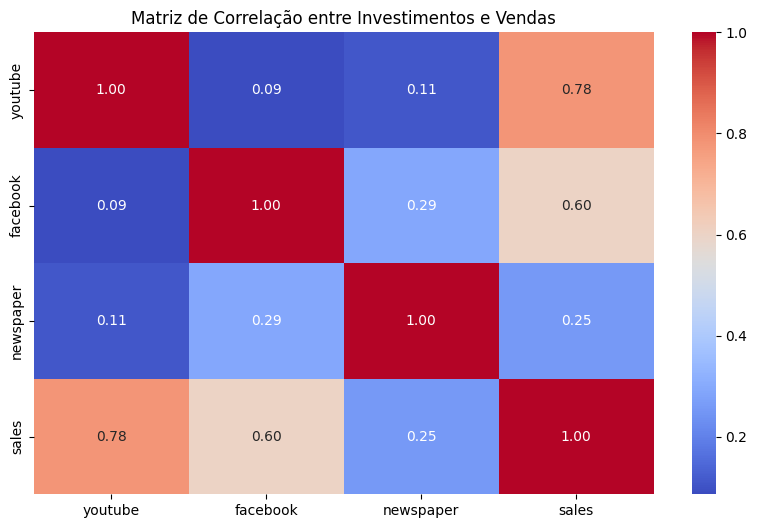

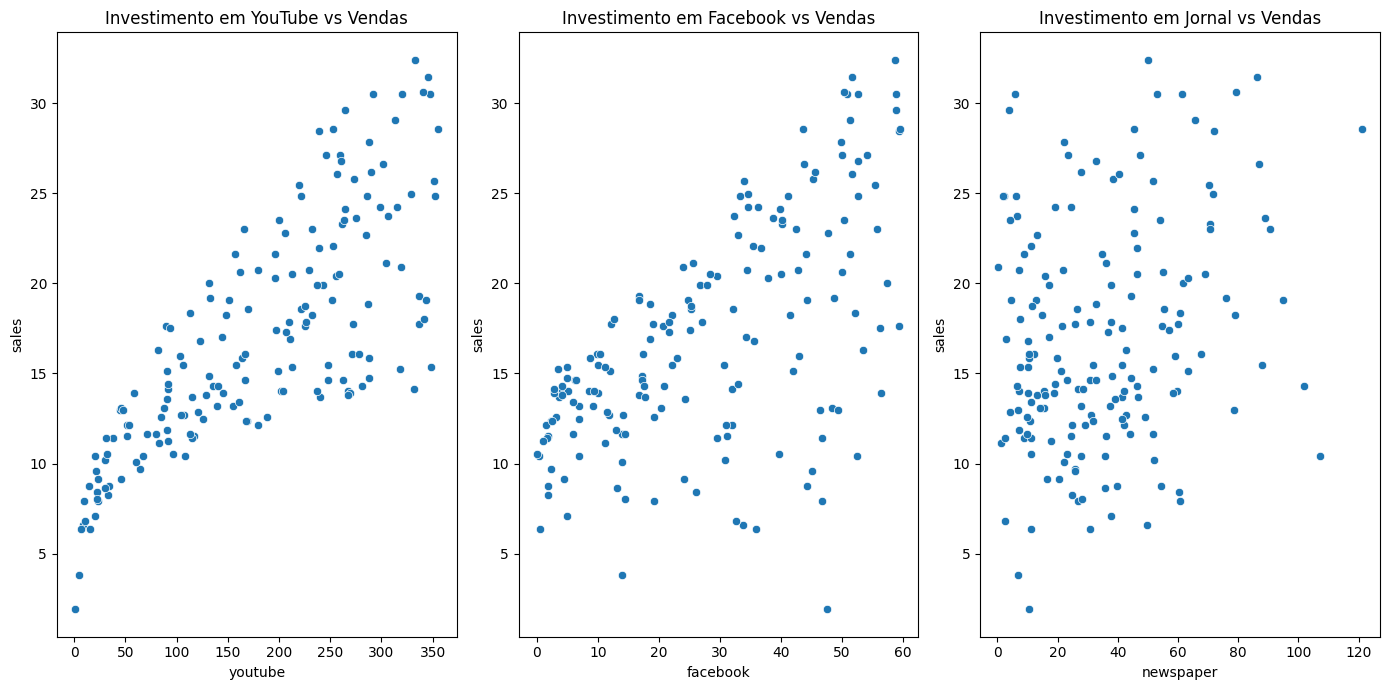

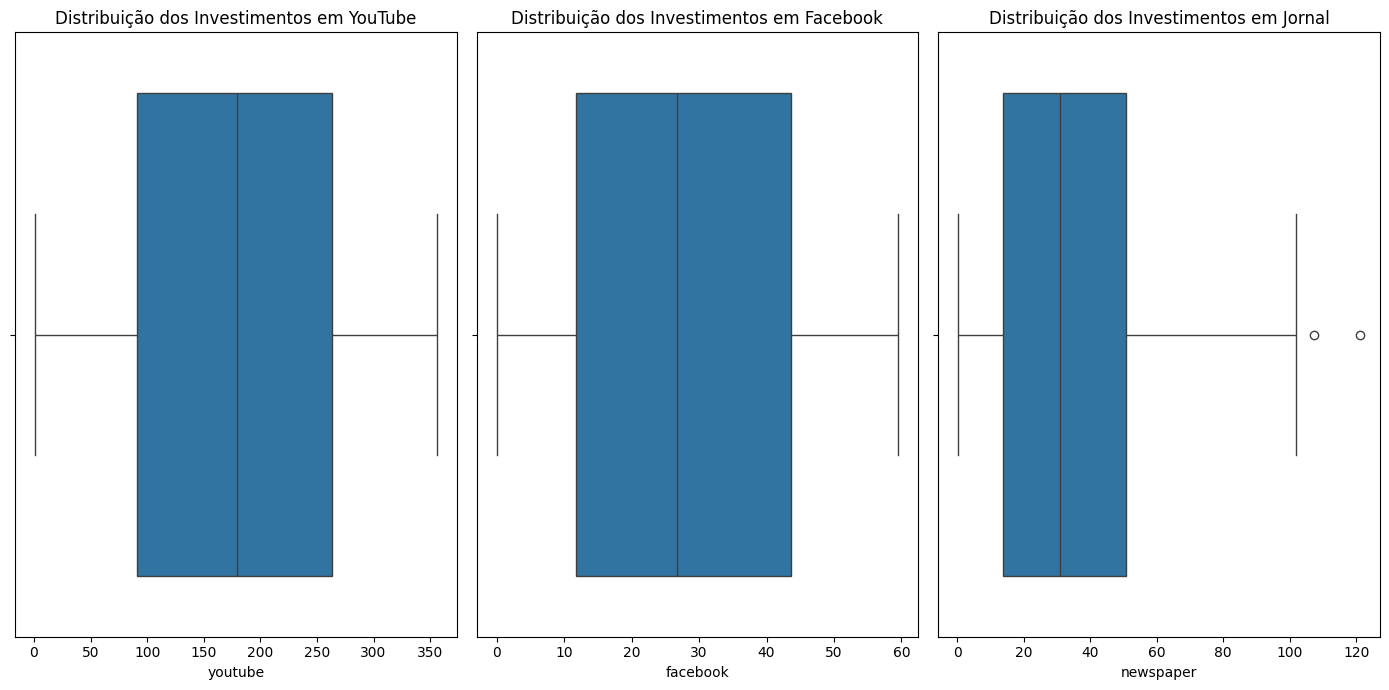

In [9]:
# Importando as bibliotecas necessárias para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo a matriz de correlação entre as variáveis
print("\nMatriz de correlação entre as variáveis:")
correlation_matrix = MKT.corr()
print(correlation_matrix)

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Investimentos e Vendas")
plt.show()

# Criando gráficos de dispersão para analisar a relação entre os investimentos e as vendas
plt.figure(figsize=(14, 7))

# Gráfico de dispersão entre YouTube e vendas
plt.subplot(1, 3, 1)
sns.scatterplot(x='youtube', y='sales', data=MKT)
plt.title('Investimento em YouTube vs Vendas')

# Gráfico de dispersão entre Facebook e vendas
plt.subplot(1, 3, 2)
sns.scatterplot(x='facebook', y='sales', data=MKT)
plt.title('Investimento em Facebook vs Vendas')

# Gráfico de dispersão entre Jornal e vendas
plt.subplot(1, 3, 3)
sns.scatterplot(x='newspaper', y='sales', data=MKT)
plt.title('Investimento em Jornal vs Vendas')

plt.tight_layout()
plt.show()

# Verificando a existência de outliers visualmente
# Boxplots para verificar a dispersão das variáveis e detectar outliers
plt.figure(figsize=(14, 7))

# Boxplot para a variável YouTube
plt.subplot(1, 3, 1)
sns.boxplot(x=MKT['youtube'])
plt.title('Distribuição dos Investimentos em YouTube')

# Boxplot para a variável Facebook
plt.subplot(1, 3, 2)
sns.boxplot(x=MKT['facebook'])
plt.title('Distribuição dos Investimentos em Facebook')

# Boxplot para a variável Jornal
plt.subplot(1, 3, 3)
sns.boxplot(x=MKT['newspaper'])
plt.title('Distribuição dos Investimentos em Jornal')

plt.tight_layout()
plt.show()


###**Etapa 03: Modelagem** , vamos construir um modelo de **regressão linear** simples que seja capaz de prever o valor das vendas com base em nossos investimentos no YouTube, Facebook e Jornal. A regressão linear é uma técnica que modela a relação entre uma variável dependente (vendas) e uma ou mais variáveis ​​independentes (investimentos).

### Passos:

1. **Importar as bibliotecas de permissão** .
2. **Dividir os dados** em variáveis ​​dependentes e independentes.
3. **Dividir o conjunto de dados** em treino e teste.
4. **Treinar o modelo de regressão linear** .
5. **Avaliar o modelo** com análises como o erro quadrático médio (MSE) e o coeficiente de determinação (R2R2).

### Explicação:

1. **Importação das bibliotecas** :
    - `train_test_split`: Dividimos o conjunto de dados em treino e teste, garantindo que o modelo seja avaliado de forma justa.
    - `LinearRegression`: A função que cria o modelo de regressão linear.
    - `mean_squared_error`e


In [10]:
# Importando as bibliotecas necessárias para modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separando as variáveis independentes (X) e a variável dependente (y)
X = MKT[['youtube', 'facebook', 'newspaper']]  # Variáveis independentes (investimentos)
y = MKT['sales']  # Variável dependente (vendas)

# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo de regressão com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando Erro Quadrático Médio (MSE) e R-Squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Mean Squared Error (MSE): 5.58
Coeficiente de Determinação (R²): 0.87


Na **Etapa 04: Calculando Predição** , usaremos o modelo de regressão linear treinado na **Etapa 03** para realizar soluções de vendas com base em novos valores de investimento em marketing (YouTube, Facebook e Jornal). Isso permitirá que uma empresa avalie o impacto de diferentes níveis de investimento em suas vendas.

### Passos:

1. **Definir novos valores de investimento** .
2. **Usar o modelo treinado para prever as vendas** com esses novos investimentos.
3. **Interpretar a abrangência** para entender como os investimentos impactantes em vendas.

In [11]:
# Definindo novos valores de investimento para prever as vendas
novos_investimentos = pd.DataFrame({
    'youtube': [200],  # Exemplo: investimento de 200 no YouTube
    'facebook': [50],  # Exemplo: investimento de 50 no Facebook
    'newspaper': [30]  # Exemplo: investimento de 30 no Jornal
})

# Fazendo a previsão de vendas com base nos novos valores de investimento
vendas_previstas = model.predict(novos_investimentos)

# Exibindo o resultado da previsão
print(f"Previsão de vendas para os novos investimentos: {vendas_previstas[0]:.2f}")


Previsão de vendas para os novos investimentos: 22.26


### Explicação:

1. **Novos investimentos** :
    
    - Definimos novos valores de investimento no **YouTube** , **Facebook** e **Jornal** como exemplo para prever o impacto nas vendas.
    - Esses valores podem ser ajustados de acordo com o cenário ou orçamento que a empresa deseja testar.
2. **Previsão de vendas** :
    
    - Usamos o modelo de regressão treinado ( `model`) para prever as vendas com os novos valores de investimento usando a função `predict()`.
    - O resultado será o valor previsto de vendas com base nos valores de investimento fornecidos.
3. **Interpretação** :
    
    - A previsão nos dá uma estimativa de quais vendas a empresa pode esperar ao investir os valores fornecidos em suas campanhas de marketing.
    - Isso ajuda a empresa a entender como diferentes níveis de investimento impactam as vendas e a tomada de decisões de alocação de orçamento.

### Exemplo de saída:

Se a empresa investir **200** no YouTube, **50** no Facebook e **30** no Jornal, a previsão de vendas poderá ser algo como:

Previsão de vendas para os novos investimentos: 22.26

Essa previsão ajudará a empresa a ajustar suas estratégias de marketing com base nos retornos esperados.

### **Conclusão**

Após realizar as etapas descritas no desafio, apresentamos alguns pontos importantes que podem orientar a empresa em suas decisões sobre investimentos em marketing:

1. ###  **Análise Descritiva** :
    
    - Observamos que o conjunto de dados estava completo, sem valores ausentes ou duplicados, e bem distribuído para análise.
    - As estatísticas descritivas mostraram variações específicas nos investimentos em YouTube, Facebook e Jornal, bem como nas vendas, ou que nos deram um ponto de partida sólido para entender o comportamento dos dados.

2.  ### **Análise Exploratória** :
    
    - Identificamos que os investimentos no **YouTube** e **Facebook** têm um brilho positivo significativo com as vendas, indicando que esses canais têm um impacto maior no retorno de vendas.
    - O investimento no **Jornal** mostrou uma clareza menor, o que indica que seu impacto nas vendas é mais limitado ou menos direto.
    - Além disso, a análise dos gráficos de dispersão reforçou a relação linear entre as variáveis ​​de investimento e as vendas, especialmente no caso de YouTube e Facebook.
3.  ### **Modelagem** :
    
    - Usamos uma **regressão linear** para modelar a relação entre os investimentos em marketing e as vendas. O modelo foi treinado com um bom desempenho, conforme indicado pelo coeficiente de determinação (R2R^2R2) que nos mostrou quão bem o modelo conseguiu explicar a variação nas vendas.
    - O modelo mostrou que é possível prever as vendas com base

4. ### **Previsão** :

- Usando o modelo de regressão linear, conseguimos gerar **soluções específicas** sobre o impacto de diferentes níveis de investimento em marketing. Por exemplo, as específicas indicam um **potencial de crescimento nas vendas** ao aumentar os investimentos no **YouTube** e **Facebook** , mostrando que esses canais têm maior influência no aumento das vendas.
- Essas opções oferecem à empresa uma **base sólida** para tomar **decisões estratégicas** , permitindo ajustar os investimentos em marketing de maneira mais eficiente e direcionada, maximizando o retorno sobre os investimentos em campanhas publicitárias.
